In [1]:
RANDOM_SEED = 42

In [2]:
import os

# 현재 스크립트 파일의 디렉토리 경로 가져오기
script_dir = os.path.dirname(r'C:\Users\pop75\OneDrive\바탕 화면\Qunova')

# 하위 폴더의 경로 설정 (예: subfolder)
subfolder = 'subfolder'

# 하위 폴더의 절대 경로 생성
subfolder_path = os.path.join(script_dir, subfolder)

# 환경 변수 PATH에 하위 폴더 경로 추가
os.environ['PATH'] += os.pathsep + subfolder_path

In [3]:
import pandas as pd
from TDC.tdc import utils as tdc_utils
from TDC.tdc.single_pred import Tox
import RDK as rk
from DeepPurpose import utils as dp_utils, CompoundPred
import numpy as np

## Prepare Data(TDC package, herg)

In [79]:
import random
X, y = Tox(name = 'clintox').get_data(format = 'DeepPurpose')
## get 50000 molecule
Data_num = 200
Drug_info_plus, Tox_info_plus = X[y==1][:Data_num], y[y==1][:Data_num]
Drug_info_minus, Tox_info_minus = X[y==0][:Data_num], y[y==0][:Data_num]
Drug_info = np.array(list(Drug_info_plus)+list(Drug_info_minus))
Tox_info = np.array(list(Tox_info_plus)+list(Tox_info_minus))

Found local copy...
Loading...
Done!


In [80]:
len(X)

1478

In [81]:
## Change SMILE to RDkit fingerprint
Drug_fin = rk.smile_to_RDkit(Drug_info,bits=2048)

In [82]:
Drug_16_smote, Tox_info_smote = smote.fit_resample(Drug_fin, Tox_info)

In [83]:
Drug_16_smote = np.array(Drug_16_smote)

In [84]:
Drug_16_smote[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.combine import *
from sklearn.manifold import TSNE
dim = 32
pca = PCA(n_components=dim)
Drug_16 = pca.fit_transform(Drug_fin)
tsne = TSNE(n_components=2)
Drug_16 = tsne.fit_transform(Drug_16)
smote = SMOTE()
Drug_16_smote,Tox_info_smote = smote.fit_resample(Drug_16, Tox_info)

In [86]:
from sklearn.model_selection import train_test_split  
train_features, test_features, train_labels, test_labels = train_test_split(Drug_16_smote,Tox_info_smote, test_size=0.3, random_state=42)

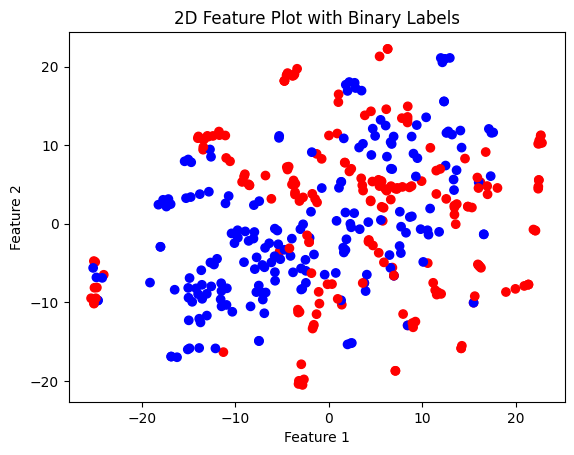

In [87]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['b' if label == 0 else 'r' for label in Tox_info_smote]
# 산점도 그리기
plt.scatter(Drug_16_smote[:, 0], Drug_16_smote[:, 1], c=colors)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Feature Plot with Binary Labels')
plt.show()

## Run with logistic regresion

In [88]:
from sklearn.linear_model import LogisticRegression  
from imblearn.over_sampling import SMOTE
from imblearn.combine import *
from sklearn.decomposition import PCA

model = LogisticRegression()
model.fit(train_features, train_labels)
accuracy = model.score(test_features, test_labels)
train_accuracy = model.score(train_features, train_labels)
print(f"Test set accuracy: {accuracy}, Train set accuracy : {train_accuracy}")

Test set accuracy: 0.575, Train set accuracy : 0.6214285714285714


In [89]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
rk.Result(model,Drug_16_smote,Tox_info_smote,plot=False)

--------------------0 KFold-------------------
train_idx_len : 300 / test_idx_len : 100
AUC: 0.627
Test set accuracy: 0.550, Train set accuracy : 0.580
precision : 0.536
recall : 0.612
f1_score : 0.571
--------------------1 KFold-------------------
train_idx_len : 300 / test_idx_len : 100
AUC: 0.745
Test set accuracy: 0.660, Train set accuracy : 0.583
precision : 0.647
recall : 0.673
f1_score : 0.660
--------------------2 KFold-------------------
train_idx_len : 300 / test_idx_len : 100
AUC: 0.647
Test set accuracy: 0.600, Train set accuracy : 0.590
precision : 0.620
recall : 0.596
f1_score : 0.608
--------------------3 KFold-------------------
train_idx_len : 300 / test_idx_len : 100
AUC: 0.556
Test set accuracy: 0.530, Train set accuracy : 0.647
precision : 0.529
recall : 0.540
f1_score : 0.535


average values
AUC: 0.644
Test set accuracy: 0.585
precision : 0.583
recall : 0.605
f1_score : 0.593


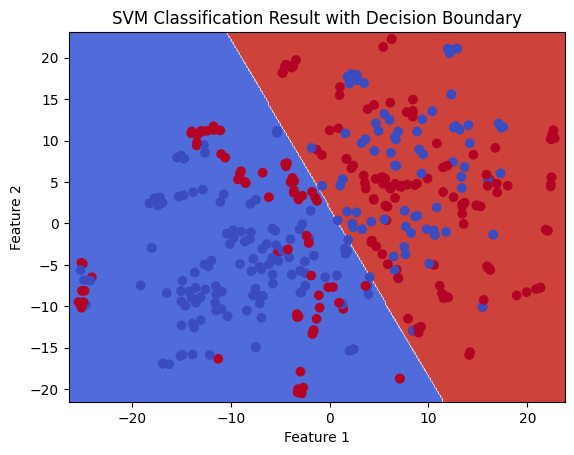

In [90]:
# 결정 경계를 시각화하기 위한 그리드 생성
try:
    x_min, x_max = Drug_16_smote[:, 0].min() - 1, Drug_16_smote[:, 0].max() + 1
    y_min, y_max = Drug_16_smote[:, 1].min() - 1, Drug_16_smote[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
    # 결정 경계 예측
    Z = model.predict(np.c_[(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # 데이터 포인트와 결정 경계 시각화
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=1)
    plt.scatter(Drug_16_smote[:, 0], Drug_16_smote[:, 1], c=Tox_info_smote, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Classification Result with Decision Boundary')
    plt.show()
except:
    pass

## Run with Neural network

In [91]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
SPLITS = 4
kf = KFold(n_splits = SPLITS,shuffle=True)
n_iter = 0
mlp = MLPClassifier(hidden_layer_sizes=(100,30), max_iter=12000, random_state=42,learning_rate='constant',alpha=0.01)
mlp.fit(train_features,train_labels)
#scaler = StandardScaler()  
accuracy = mlp.score(test_features, test_labels)
train_accuracy = mlp.score(train_features, train_labels)
print(f"Test set accuracy: {accuracy}, Train set accuracy : {train_accuracy}")

Test set accuracy: 0.7333333333333333, Train set accuracy : 0.8821428571428571


In [92]:
rk.Result(mlp,Drug_16_smote,Tox_info_smote,plot=False)

--------------------0 KFold-------------------
train_idx_len : 300 / test_idx_len : 100
AUC: 0.868
Test set accuracy: 0.790, Train set accuracy : 0.863
precision : 0.739
recall : 0.791
f1_score : 0.764
--------------------1 KFold-------------------
train_idx_len : 300 / test_idx_len : 100
AUC: 0.850
Test set accuracy: 0.760, Train set accuracy : 0.890
precision : 0.829
recall : 0.667
f1_score : 0.739
--------------------2 KFold-------------------
train_idx_len : 300 / test_idx_len : 100
AUC: 0.854
Test set accuracy: 0.770, Train set accuracy : 0.843
precision : 0.846
recall : 0.746
f1_score : 0.793
--------------------3 KFold-------------------
train_idx_len : 300 / test_idx_len : 100
AUC: 0.884
Test set accuracy: 0.790, Train set accuracy : 0.830
precision : 0.760
recall : 0.809
f1_score : 0.784


average values
AUC: 0.864
Test set accuracy: 0.778
precision : 0.794
recall : 0.753
f1_score : 0.770


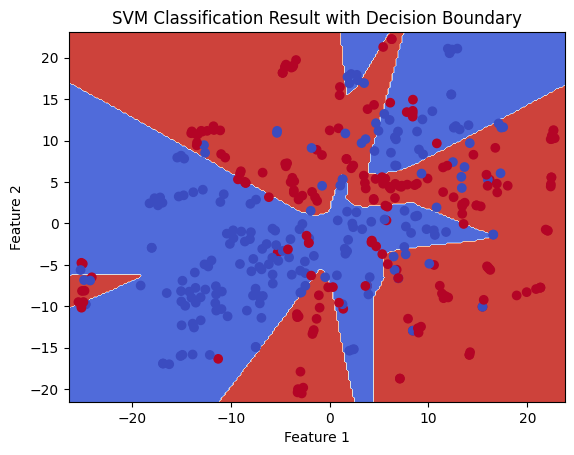

In [93]:
# 결정 경계를 시각화하기 위한 그리드 생성
try:
    x_min, x_max = Drug_16_smote[:, 0].min() - 1, Drug_16_smote[:, 0].max() + 1
    y_min, y_max = Drug_16_smote[:, 1].min() - 1, Drug_16_smote[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
    # 결정 경계 예측
    Z = mlp.predict(np.c_[(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # 데이터 포인트와 결정 경계 시각화
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=1)
    plt.scatter(Drug_16_smote[:, 0], Drug_16_smote[:, 1], c=Tox_info_smote, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Classification Result with Decision Boundary')
    plt.show()
except:
    pass

## Quantum kernal train

In [25]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

## Make the feature map
ZZ_feature_map = ZZFeatureMap(feature_dimension=dim, reps=1, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)
## K(a,b)
q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=ZZ_feature_map)
## Pre evaluatre the inner product value
q_matrix_train = q_kernel.evaluate(x_vec=train_features)
q_matrix_test = q_kernel.evaluate(x_vec=test_features, y_vec=train_features)

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics

q_svc = SVC(kernel="precomputed")

q_svc.fit(q_matrix_train, train_labels)

accuracy = q_svc.score(q_matrix_test, test_labels)

train_accuracy = q_svc.score(q_matrix_train , train_labels)

print(f"Quantum result Test set accuracy: {accuracy}, Train set accuracy : {train_accuracy}")

y_scores = q_svc.predict(q_matrix_train)

print("\nTrain Result")
print("accuracy: ", metrics.accuracy_score(train_labels, y_scores))
print("precision: ", metrics.precision_score(train_labels, y_scores)) 
print("recall: ", metrics.recall_score(train_labels, y_scores))
print("f1: ", metrics.f1_score(train_labels, y_scores))
print("area under curve (auc): ", metrics.roc_auc_score(train_labels, y_scores))

y_scores = q_svc.predict(q_matrix_test)

print("\nTest Result")
print("accuracy: ", metrics.accuracy_score(test_labels, y_scores))
print("precision: ", metrics.precision_score(test_labels, y_scores)) 
print("recall: ", metrics.recall_score(test_labels, y_scores))
print("f1: ", metrics.f1_score(test_labels, y_scores))
print("area under curve (auc): ", metrics.roc_auc_score(test_labels, y_scores))

Quantum result Test set accuracy: 0.44166666666666665, Train set accuracy : 0.6142857142857143

Train Result
accuracy:  0.6142857142857143
precision:  0.6237623762376238
recall:  0.47368421052631576
f1:  0.5384615384615384
area under curve (auc):  0.6075904045828857

Test Result
accuracy:  0.44166666666666665
precision:  0.5
recall:  0.3880597014925373
f1:  0.4369747899159664
area under curve (auc):  0.4487468318783441


## visualization

In [29]:
x_min, x_max = Drug_16_smote[:, 0].min() - 1, Drug_16_smote[:, 0].max() + 1
y_min, y_max = Drug_16_smote[:, 1].min() - 1, Drug_16_smote[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
len(np.c_[(xx.ravel(), yy.ravel())])

54000

In [30]:
q_kernel.evaluate(x_vec=train_features, y_vec=[-3.00443548, -3.37674433])[3]

array([0.19022295])

In [36]:
# 결정 경계를 시각화하기 위한 그리드 생성
x_min, x_max = Drug_16_smote[:, 0].min() - 1, Drug_16_smote[:, 0].max() + 1
y_min, y_max = Drug_16_smote[:, 1].min() - 1, Drug_16_smote[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Visual_keranl = [q_kernel.evaluate(x_vec=train_features, y_vec=i) for i in np.c_[(xx.ravel(), yy.ravel())]]
# 결정 경계 예측
result = []
# 3차원 리스트를 반복하여 안쪽 리스트의 각 요소를 추출
for outer_list in Visual_keranl:
    inner_result = []  # 각 안쪽 리스트를 저장할 리스트
    for inner_list in outer_list:
        for item in inner_list:
            inner_result.append(item)
    result.append(inner_result)

Z = q_svc.predict(result)
Z = Z.reshape(xx.shape)
# 데이터 포인트와 결정 경계 시각화
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=1)
plt.scatter(Drug_16_smote[:, 0], Drug_16_smote[:, 1], c=Tox_info_smote, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification Result with Decision Boundary')
plt.show()








In [ ]:
data = Visual_keranl

result = []

# 3차원 리스트를 반복하여 안쪽 리스트의 각 요소를 추출
for outer_list in data:
    inner_result = []  # 각 안쪽 리스트를 저장할 리스트
    for inner_list in outer_list:
        for item in inner_list:
            inner_result.append(item)
    result.append(inner_result)

print(result)

[[0.2873462425389336, 0.5034847764697371, 0.129494233241393, 0.560555098740015, 0.2733812302670229, 0.0275149524835666, 0.3533593974844264, 0.1116289431923237, 0.3567646624771901, 0.6071817171472882, 0.2172056530938859, 0.0743097118753796, 0.0632876726969437, 0.0741506079254727, 0.1218578066611876, 0.0154859101905268, 0.5249298252917026, 0.7344759857596047, 0.0864943912478677, 0.261312677723071, 0.023045121491951, 0.1115612479049514, 0.2496029634059628, 0.260872327188921, 0.116594133002451, 0.262757717345195, 0.1847369826453204, 0.5785500198460295, 0.1532487799397717, 0.3074431286761513, 0.2723017059694856, 0.1328351204167687, 0.025618189578337, 0.0178217147689066, 0.7305995873238773, 0.0068699211478071, 0.7092736657527727, 0.3969051891850998, 0.0473042746293462, 0.0274955761065982, 0.0520749418623903, 0.2736551103398946, 0.6058353199109145, 0.3023800800421782, 0.3386185156135514, 0.0692038162692004, 0.0360579625044243, 0.4548735596588601, 0.0644967442901614, 0.0515179417530226, 0.1337

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics

linear_svc = SVC(kernel="linear")

linear_svc.fit(train_features, train_labels)

accuracy = linear_svc.score(test_features, test_labels)

train_accuracy = linear_svc.score(train_features , train_labels)


print(f"Test set accuracy: {accuracy}, Train set accuracy : {train_accuracy}")

y_scores = linear_svc.predict(train_features)

print("\nTrain Result")
print("accuracy: ", metrics.accuracy_score(train_labels, y_scores))
print("precision: ", metrics.precision_score(train_labels, y_scores)) 
print("recall: ", metrics.recall_score(train_labels, y_scores))
print("f1: ", metrics.f1_score(train_labels, y_scores))
print("area under curve (auc): ", metrics.roc_auc_score(train_labels, y_scores))

y_scores = linear_svc.predict(test_features)

print("\nTest Result")
print("accuracy: ", metrics.accuracy_score(test_labels, y_scores))
print("precision: ", metrics.precision_score(test_labels, y_scores)) 
print("recall: ", metrics.recall_score(test_labels, y_scores))
print("f1: ", metrics.f1_score(test_labels, y_scores))
print("area under curve (auc): ", metrics.roc_auc_score(test_labels, y_scores))

Test set accuracy: 0.8166666666666667, Train set accuracy : 0.7714285714285715

Train Result
accuracy:  0.7714285714285715
precision:  0.7674418604651163
recall:  0.7443609022556391
f1:  0.7557251908396948
area under curve (auc):  0.770139634801289

Test Result
accuracy:  0.8166666666666667
precision:  0.8260869565217391
recall:  0.8507462686567164
f1:  0.838235294117647
area under curve (auc):  0.8121655871585469


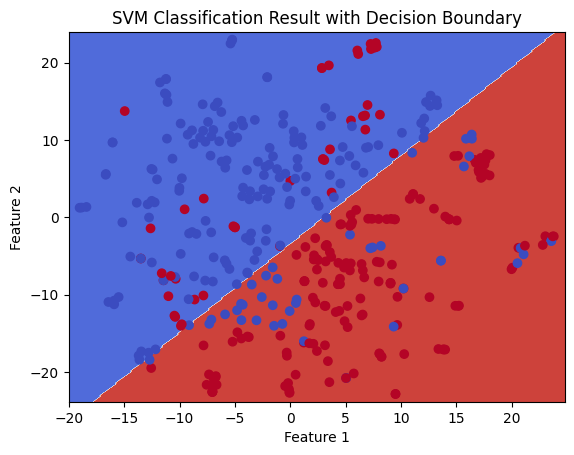

In [33]:
# 결정 경계를 시각화하기 위한 그리드 생성
x_min, x_max = Drug_16_smote[:, 0].min() - 1, Drug_16_smote[:, 0].max() + 1
y_min, y_max = Drug_16_smote[:, 1].min() - 1, Drug_16_smote[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
# 결정 경계 예측
Z = linear_svc .predict(np.c_[(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# 데이터 포인트와 결정 경계 시각화
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=1)
plt.scatter(Drug_16_smote[:, 0], Drug_16_smote[:, 1], c=Tox_info_smote, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification Result with Decision Boundary')
plt.show()


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics

rbf_svc = SVC(kernel="rbf")

rbf_svc.fit(train_features, train_labels)

accuracy = rbf_svc.score(test_features, test_labels)

train_accuracy = rbf_svc.score(train_features , train_labels)


print(f"Test set accuracy: {accuracy}, Train set accuracy : {train_accuracy}")

y_scores = rbf_svc.predict(train_features)

print("\nTrain Result")
print("accuracy: ", metrics.accuracy_score(train_labels, y_scores))
print("precision: ", metrics.precision_score(train_labels, y_scores)) 
print("recall: ", metrics.recall_score(train_labels, y_scores))
print("f1: ", metrics.f1_score(train_labels, y_scores))
print("area under curve (auc): ", metrics.roc_auc_score(train_labels, y_scores))

y_scores = rbf_svc.predict(test_features)

print("\nTest Result")
print("accuracy: ", metrics.accuracy_score(test_labels, y_scores))
print("precision: ", metrics.precision_score(test_labels, y_scores)) 
print("recall: ", metrics.recall_score(test_labels, y_scores))
print("f1: ", metrics.f1_score(test_labels, y_scores))
print("area under curve (auc): ", metrics.roc_auc_score(test_labels, y_scores))

Test set accuracy: 0.8583333333333333, Train set accuracy : 0.8321428571428572

Train Result
accuracy:  0.8321428571428572
precision:  0.8359375
recall:  0.8045112781954887
f1:  0.8199233716475097
area under curve (auc):  0.830827067669173

Test Result
accuracy:  0.8583333333333333
precision:  0.8676470588235294
recall:  0.8805970149253731
f1:  0.874074074074074
area under curve (auc):  0.8553928470853281


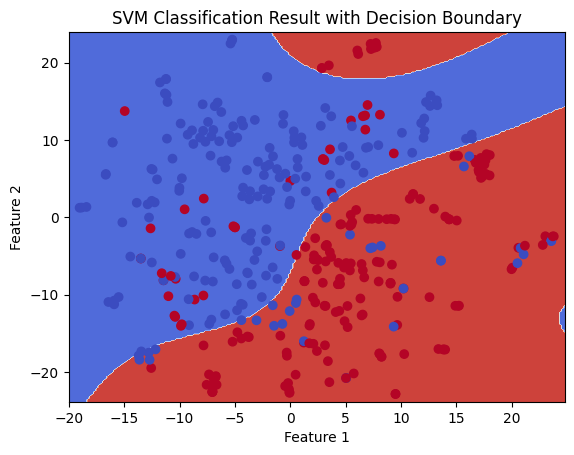

In [35]:
# 결정 경계를 시각화하기 위한 그리드 생성
x_min, x_max = Drug_16_smote[:, 0].min() - 1, Drug_16_smote[:, 0].max() + 1
y_min, y_max = Drug_16_smote[:, 1].min() - 1, Drug_16_smote[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
# 결정 경계 예측
Z = rbf_svc.predict(np.c_[(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# 데이터 포인트와 결정 경계 시각화
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=1)
plt.scatter(Drug_16_smote[:, 0], Drug_16_smote[:, 1], c=Tox_info_smote, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification Result with Decision Boundary')
plt.show()
